<font size = "+3"><strong>Heart Disease</strong></font>

<font size = "+1"><strong>Report if chest pain is an indicator of a heart disease</strong></font>

<font face = "calibri">
<p>There are several types of diseases, and one of them is the heart disease. Literally, the heart disease is any disease that causes the heart not to function properly. Several factors which include lifestyle changes, abuse of illicit drug and stress can cause heart failure. <p>Note that heart diseases are of different types and each has its own symptoms. One of the symptoms of a heart disease is the chest pain. <p>In this project, we'll try to get a sense if chest pain is an indicator or heart disease using a Decision tree classifier

# Prepare Data

## Import

**Task 1:** Import all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import plot_tree, DecisionTreeClassifier

**Task 2:** Create a wrangle function to clean the dataset

In [2]:
#Create a wrangle function
def wrangle(filepath):
    df = pd.read_fwf(filepath)
    
    #Change the column names to match the data dictionary
    df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]] = df["63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0"].str.split(",", expand = True)

    df.drop(columns = "63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0", inplace = True)

    # Typecasting
    df = df.select_dtypes("object").astype(float)
    df[["age", "sex", "cp","fbs","restecg","exang","slope","ca","thal","num"]] = df[["age","sex", "cp","fbs","restecg","exang","slope","ca","thal","num"]].astype(int)

    #Perform binary classification:- 0 = No heart disease and >0 = Heart disease
    df["heart_disease"] = (df["num"] > 0).astype(int)

    #Replace categorical values with actual values
    df["sex"].replace({1:"Male", 0 : "Female"}, inplace = True)
    df["cp"].replace({1:"Typical Angina", 2 : "Atypical angina", 3 : "Non-anginal pain", 4 : "Asymptomatic"}, inplace = True)
    df["restecg"].replace({0:"Normal", 1 : "Abnormal", 2 : "Abnormal"}, inplace = True)
    df["exang"].replace({1:"Yes", 0 : "No"}, inplace = True)
    df["fbs"].replace({1:"True", 0 : "False"}, inplace = True)
    df["slope"].replace({1: "upsloping", 2: "Flat", 3: "Down sloping"}, inplace = True)
    df["thal"].replace({3: 'Normal', 6: 'Fixed defect' , 7: 'Reversible defect'}, inplace = True)    
    df = df[(df.thal != 0)]

    df.drop(columns = "num", inplace = True)

    return df
    
df = wrangle("processed.cleveland.data")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,67,Male,Asymptomatic,160.0,286.0,False,Abnormal,108.0,Yes,1.5,Flat,3,Normal,1
1,67,Male,Asymptomatic,120.0,229.0,False,Abnormal,129.0,Yes,2.6,Flat,2,Reversible defect,1
2,37,Male,Non-anginal pain,130.0,250.0,False,Normal,187.0,No,3.5,Down sloping,0,Normal,0
3,41,Female,Atypical angina,130.0,204.0,False,Abnormal,172.0,No,1.4,upsloping,0,Normal,0
4,56,Male,Atypical angina,120.0,236.0,False,Normal,178.0,No,0.8,upsloping,0,Normal,0


**Comment:** The binary classification of the heart disease is 0 is classified as 'no heart disease' while numbers greater than 0 are classified as heart disease

**Task 3:** Inspect dataframe

In [3]:
print("Shape of dataframe: ", df.shape)
print("Dataframe information\n")
df.info()

Shape of dataframe:  (300, 14)
Dataframe information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 301
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            300 non-null    int32  
 1   sex            300 non-null    object 
 2   cp             300 non-null    object 
 3   trestbps       300 non-null    float64
 4   chol           300 non-null    float64
 5   fbs            300 non-null    object 
 6   restecg        300 non-null    object 
 7   thalach        300 non-null    float64
 8   exang          300 non-null    object 
 9   oldpeak        300 non-null    float64
 10  slope          300 non-null    object 
 11  ca             300 non-null    int32  
 12  thal           300 non-null    object 
 13  heart_disease  300 non-null    int32  
dtypes: float64(4), int32(3), object(7)
memory usage: 31.6+ KB


## Explore

**Task 4.1:** Check the proportion of people with heart disease and people without

In [4]:
major, minor = df["heart_disease"].value_counts(normalize = True)
print("Proportion without heart disease: ", major)
print("Proportion with heart disease: ", minor)

Proportion without heart disease:  0.54
Proportion with heart disease:  0.46


**Task 4.2:** Visualize the proportion in (1)

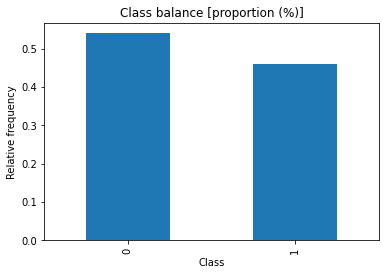

In [5]:
df["heart_disease"].value_counts(normalize = True).plot(kind = "bar")
plt.xlabel("Class")
plt.ylabel("Relative frequency")
plt.title("Class balance [proportion (%)]");

**Task 5:** Plot a correlation heatmap of the numerical features in the datafram to check if the data frame has multicollinearity issues

In [6]:
corr = df.select_dtypes("number").drop(columns = "heart_disease").corr()
corr

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.283051,0.209471,-0.396613,0.200888,0.368091
trestbps,0.283051,1.000000,0.130186,-0.046479,0.186623,0.098686
chol,0.209471,0.130186,1.000000,-0.005679,0.045902,0.120258
thalach,-0.396613,-0.046479,-0.005679,1.000000,-0.350123,-0.270332
oldpeak,0.200888,0.186623,0.045902,-0.350123,1.000000,0.303199
ca,0.368091,0.098686,0.120258,-0.270332,0.303199,1.000000


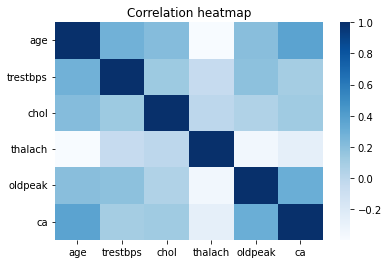

In [7]:
sns.heatmap(corr, cmap = "Blues")
plt.title("Correlation heatmap");

***Comment:*** There is no highly correlated features in the dataframe

**Task 6:** Create a boxplot to display the distributions of the `"age"` column for both groups in the `"disease"` column.

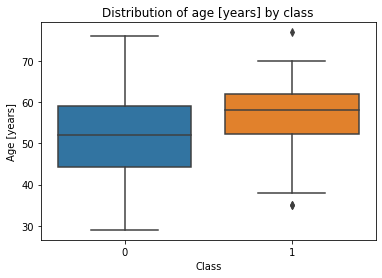

In [8]:
sns.boxplot(data = df, x = "heart_disease", y = "age")
plt.xlabel("Class")
plt.ylabel("Age [years]")
plt.title("Distribution of age [years] by class");

***Comment:*** The boxplot shows that 50% of people that do not have heart disease are between 45 and 60 years old, while 50% of people that have heart disease are between 52 and 60 years old

**Task 7.1:** Create a pivot table to check if any of the gender `"male"` or `"female"` likely to suffer a heart disease than the other

In [9]:
sex_pivot = pd.pivot_table(
    df, "heart_disease", "sex", aggfunc = np.mean
).sort_values(by = "heart_disease", ascending = False)
sex_pivot

,heart_disease
sex,
Male,0.553922
Female,0.260417


**Task 7.2:** Visualize the pivot table in (7.1)

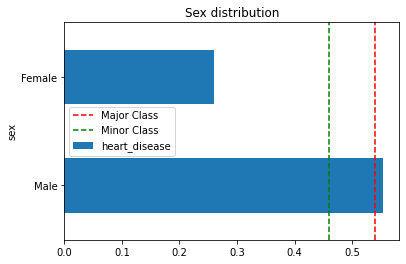

In [10]:
sex_pivot.plot(kind = "barh")
plt.axvline(major, color = "red", linestyle = "--", label = "Major Class")
plt.axvline(minor, color = "green", linestyle = "--", label = "Minor Class")
plt.title("Sex distribution")
plt.legend();

***Comment:*** The bar chart shows that the male gender is more likely to have a heart disease

**Task 8.1:** Create a pivot table to check the distribution of the symptoms

In [11]:
cp_pivot = pd.pivot_table(
    df, "heart_disease", "cp", aggfunc = np.mean
).sort_values("heart_disease", ascending = False)
cp_pivot

,heart_disease
cp,
Asymptomatic,0.727273
Typical Angina,0.318182
Non-anginal pain,0.211765
Atypical angina,0.180000


**Task 8.2:** Visualize the pivot table in (8.1)

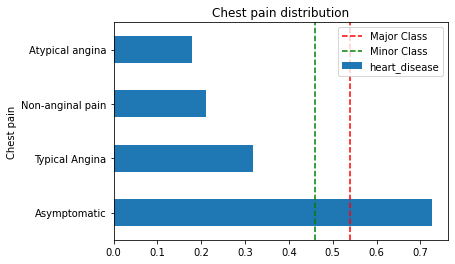

In [12]:
cp_pivot.plot(kind = "barh")
plt.axvline(major, color = "red", linestyle = "--", label = "Major Class")
plt.axvline(minor, color = "green", linestyle = "--", label = "Minor Class")
plt.ylabel("Chest pain")
plt.title("Chest pain distribution")
plt.legend();

***Comment:*** The bar chart shows that people that are asymptomatic are more likely to suffer heart disease (because they do not show any symptom)

## Split

**Task 9:** Create the feature matrix `X` and target vector `y`. The target in this case is `"heart_disease"`. 

In [13]:
target = 'heart_disease'
y = df[target]
X = df.drop(columns = target)

**Task 10:** Create a train_test_split to split the training and test data

In [14]:
# Here, the test data is 20% of the whole data set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 50
)

**Task 11:** Create a train_test_split to split the validation data

In [15]:
# Here, the test data is 20% of the whole data set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state = 50
)

# Build Model

## Baseline

**Task 12:** Calculate the baseline accuracy score of this model

In [16]:
acc_score = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy score: ", round(acc_score, 2))

Baseline Accuracy score:  0.51


## Iterate

**Task 13:** Instantiate and train the model

In [17]:
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state = 2)
)
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['sex', 'cp', 'fbs', 'restecg', 'exang',
                                      'slope', 'thal'],
                                mapping=[{'col': 'sex', 'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'cp', 'data_type': dtype('O'),
                                          'mapping': Asymptomatic        1
Typical Angina      2
Non-anginal pain    3
Atypical angina     4
NaN                -2
dtype: int64},
                                         {'col': 'fbs', 'data_type': dtype('O'),
                                          'm...
dtype: int64},
                                         {'col': 'exang',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'slope',
                                          'data_type': dtype('O'),
                                          'mapping': upsloping       1
Flat            2
Down sloping    3
NaN            -2
dtype: int64},
                                         {'col': 'thal',
                                          'data_type': dtype('O'),
                                          'mapping': Normal               1
Reversible defect    2
Fixed defect         3
NaN                 -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=2))])

## Evaluate

**Task 14:** Calculate the training accuracy score of this model

In [18]:
train_acc = model.score(X_train, y_train)
print("Training Accuracy score: ", round(train_acc, 2))

Training Accuracy score:  1.0


**Task 15:** Calculate the test accuracy score of this model

In [19]:
test_acc = model.score(X_val, y_val)
print("Test Accuracy score: ", round(test_acc, 2))

Test Accuracy score:  0.69


**Task 16:** Get the max depth of the model

In [20]:
depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Max depth: ", depth)

Max depth:  8


**Task 16:** Generate a list of training and validation accuracy scores

In [21]:
train_acc = []
val_acc = []
for d in range(2, depth, 2):
    model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(random_state = 2, max_depth = d))
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    val_acc.append(model.score(X_val, y_val))

**Task 17:** Visualize the validation and the training accuracy scores to get the best depth

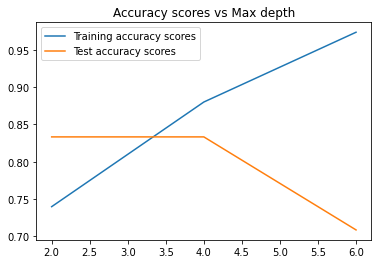

In [22]:
plt.plot(range(2, depth, 2), train_acc, label = "Training accuracy scores")
plt.plot(range(2, depth, 2), val_acc, label = "Test accuracy scores")
plt.title("Accuracy scores vs Max depth")
plt.legend();

**Task 18:** Rebuild the decision tree model with the best depth

In [23]:
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state = 2, max_depth = 3)
)
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['sex', 'cp', 'fbs', 'restecg', 'exang',
                                      'slope', 'thal'],
                                mapping=[{'col': 'sex', 'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'cp', 'data_type': dtype('O'),
                                          'mapping': Asymptomatic        1
Typical Angina      2
Non-anginal pain    3
Atypical angina     4
NaN                -2
dtype: int64},
                                         {'col': 'fbs', 'data_type': dtype('O'),
                                          'm...
dtype: int64},
                                         {'col': 'exang',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'slope',
                                          'data_type': dtype('O'),
                                          'mapping': upsloping       1
Flat            2
Down sloping    3
NaN            -2
dtype: int64},
                                         {'col': 'thal',
                                          'data_type': dtype('O'),
                                          'mapping': Normal               1
Reversible defect    2
Fixed defect         3
NaN                 -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=2))])

**Task 19:** Calculate the test accuracy score of this model

In [24]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy score: ", round(test_acc, 2))

Test Accuracy score:  0.75


# Communicate

**Task 20:** Generate an array of predictions of the model

In [25]:
model.predict_proba(X_train)[:,-1][:5]

array([0.0754717 , 0.68      , 0.78947368, 0.0754717 , 0.95652174])

**Task 21:** Calculate the feature importance of the model

In [26]:
feat_importance = model.named_steps["decisiontreeclassifier"].feature_importances_
feat_importance

array([0.1391633 , 0.        , 0.        , 0.0457217 , 0.0867582 ,
       0.        , 0.        , 0.        , 0.        , 0.0414831 ,
       0.10026256, 0.12491913, 0.46169202])

**Task 22:** Create a series to show the level of importance of the features in this model

In [27]:
odd_ratio = pd.Series(
    feat_importance, index = X_train.columns
).sort_values(ascending=True)
odd_ratio

sex         0.000000
cp          0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.041483
trestbps    0.045722
chol        0.086758
slope       0.100263
ca          0.124919
age         0.139163
thal        0.461692
dtype: float64

**Task 23:**  Create a horizontal bar chart with the relevant features from the series above

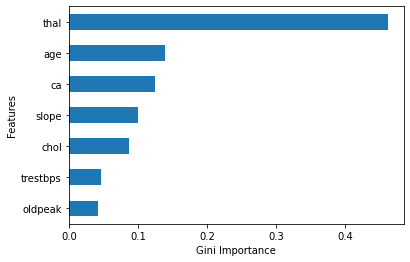

In [28]:
odd_ratio.tail(7).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features");

**Task 24:** Create a decision tree to visualize the results

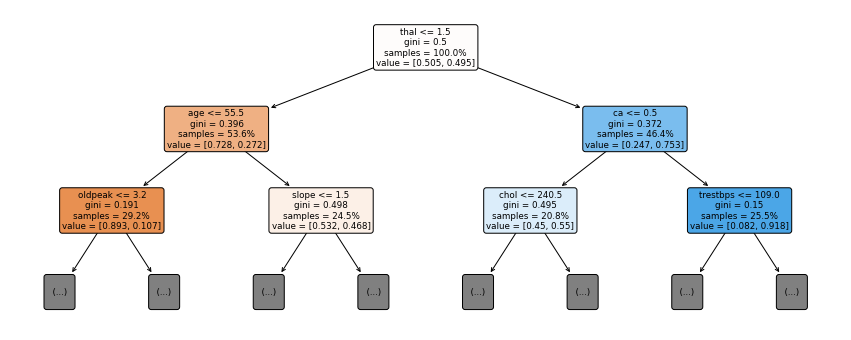

In [30]:
fig, ax = plt.subplots(figsize = [15,6])
plot_tree(
    decision_tree = model.named_steps["decisiontreeclassifier"],
    feature_names = X_train.columns,
    max_depth = 2,
    rounded = True,
    proportion = True,
    filled = True,
    ax = ax
);

# Findings

<font face = "calibri">
<p>
The major factors that contribute to heart disease are:<br>
<ul>
<li>Thalassemia</li>
<li>Age: Heart diseases are common in older people</li>
<li>The number of major vessels in a person's heart</li>
<li>Slope: People with flat slope are more likely to have heart disease than their counterparts</li>
</ul>
Other factors that contribute to heart disease based from the dataset are the resting blood pressure, ST depression  and the serum  cholesterol

# Conclusion

The *chest pain* is not an indicator of a heart disease